# Week 11 Exercise: Building a CNN Image Classifier

***Karlie Schwartzwald  
DSC 550 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:  Assignment started and completed.  
Date of Change:  11/13/2022
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 11/13/2022  

1. Load the MNIST data set.

In [1]:
# Libraries and Datasets
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
# Load data and target from MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

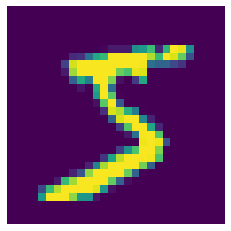

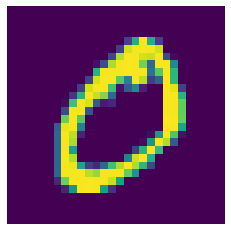

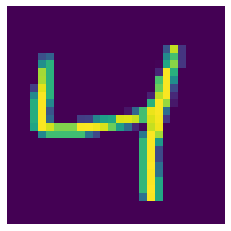

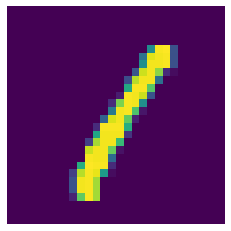

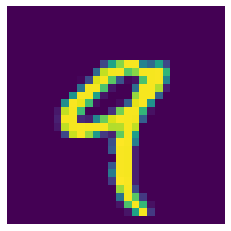

In [3]:
for i in range(5):
    plt.imshow(x_train[i]), plt.axis("off")
    plt.show()

3. Build and train a Keras CNN classifier on the MNIST training set.

In [4]:
# image dimensions are 28x28
img_rows, img_cols=28, 28

In [5]:
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)

In [6]:
# normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
# make 10 output classes
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
# CNN
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [9]:
# Compile
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
# Fit
model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 36s 294ms/step - loss: 2.4983 - accuracy: 0.1116
Epoch 2/12
120/120 [==============================] - 39s 325ms/step - loss: 2.4803 - accuracy: 0.1126
Epoch 3/12
120/120 [==============================] - 40s 330ms/step - loss: 2.4624 - accuracy: 0.1149
Epoch 4/12
120/120 [==============================] - 40s 334ms/step - loss: 2.4449 - accuracy: 0.1169
Epoch 5/12
120/120 [==============================] - 40s 329ms/step - loss: 2.4281 - accuracy: 0.1199
Epoch 6/12
120/120 [==============================] - 40s 330ms/step - loss: 2.4120 - accuracy: 0.1231
Epoch 7/12
120/120 [==============================] - 40s 333ms/step - loss: 2.3966 - accuracy: 0.1270
Epoch 8/12
120/120 [==============================] - 41s 339ms/step - loss: 2.3823 - accuracy: 0.1295
Epoch 9/12
120/120 [==============================] - 41s 338ms/step - loss: 2.3686 - accuracy: 0.1330
Epoch 10/12
120/120 [==============================] - 43s 354ms/step - l

4. Report the test accuracy of your model.

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 2.3264052867889404
accuracy= 0.18170000612735748


5. Display a confusion matrix on the test set classifications.

In [12]:
# Use model to make predictions
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 8ms/step


In [13]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [14]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm)

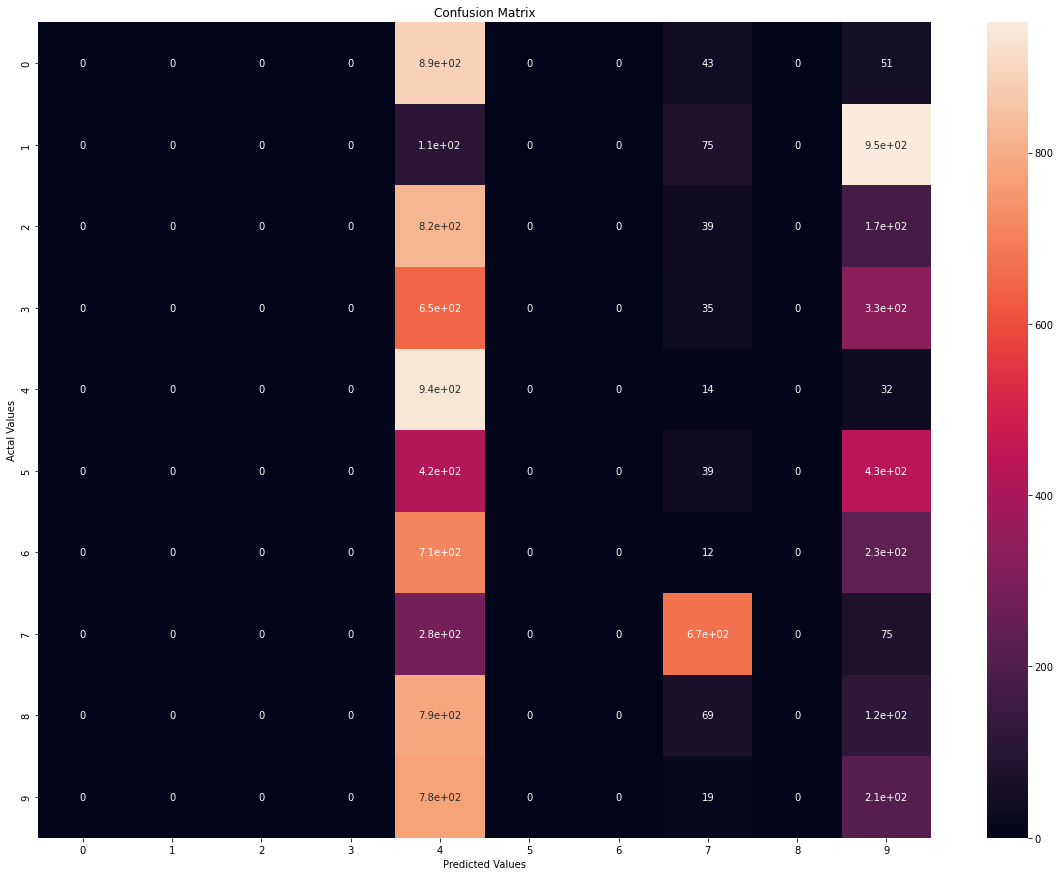

In [15]:
#Plotting the confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

6. Summarize your results.

In summary, our CNN was able to make predictions on handwritten letters that were accurate approximately 18% of the time. The most common prediction was the number 5 followed by 7, and no predictions were made for the numbers 0,1,2,3,4,5,8. This model is pretty bad at classifying.